# Code setup

In [1]:
%matplotlib inline
from theano.sandbox import cuda
#from __future__ import division, print_function

Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5103)
/home/sravya/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
import sys
sys.path.append('../PreTrainedModels')
import vgg16bn; reload(vgg16bn)
from vgg16bn import Vgg16BN

Using Theano backend.


In [3]:
import sys
sys.path.append('../utilities')
import utils; reload(utils)
from utils import *

# Prepare data

In [9]:
# Create folders
%pwd

u'/home/sravya/git/DL/dogscats'

In [4]:
CODE_DIR=%pwd
CODE_DIR

u'/home/sravya/git/DL/dogscats'

In [5]:
DATA_DIR='/home/sravya/data/catsdogs'

In [12]:
%cd $DATA_DIR
%pwd

/home/sravya/data/catsdogs


u'/home/sravya/data/catsdogs'

In [13]:
%ls

sample_submission.csv  test/  train/  valid/


In [14]:
#Create required folder structure
%mkdir train/cats
%mkdir train/dogs
%mkdir -p valid/cats
%mkdir valid/dogs
%mkdir test/unknown
%mkdir -p sample/train
%mkdir sample/valid
%mkdir sample/train/cats
%mkdir sample/train/dogs
%mkdir sample/valid/cats
%mkdir sample/valid/dogs

In [28]:
# Train = 25000 images, Test = 12500
# Train/Valid split = 80/20
VALID_SIZE=25000*20/100
SAMPLE_TRAIN_SIZE=200
SAMPLE_VALID_SIZE=50

In [22]:
from shutil import copyfile
import ntpath

In [30]:
VALID_SIZE

5000

In [32]:
%pwd

u'/home/sravya/data/catsdogs'

In [35]:
# Train -> Valid
imgs = glob('./train/*.jpg')
shuffled_images = np.random.permutation(imgs)
for i in range(VALID_SIZE): os.rename(imgs[i],'valid/'+ ntpath.basename(imgs[i]))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [38]:
# Train -> Sample/train
imgs = glob('./train/*.jpg')
shuffled_images = np.random.permutation(imgs)
for i in range(SAMPLE_TRAIN_SIZE): copyfile(imgs[i],'sample/train/'+ ntpath.basename(imgs[i]))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [39]:
# Train -> Sample/train
imgs = glob('./valid/*.jpg')
shuffled_images = np.random.permutation(imgs)
for i in range(SAMPLE_VALID_SIZE) : copyfile(imgs[i],'sample/valid/'+ ntpath.basename(imgs[i]))

In [41]:
#Move images into cats and dogs folders
%mv train/cat*.jpg train/cats/.

In [42]:
%mv train/dog*.jpg train/dogs/.
%mv valid/cat*.jpg valid/cats/.
%mv valid/dog*.jpg valid/dogs/.
%mv sample/train/cat*.jpg sample/train/cats/.
%mv sample/train/dog*.jpg sample/train/dogs/.
%mv sample/valid/cat*.jpg sample/valid/cats/.
%mv sample/valid/dog*.jpg sample/valid/dogs/.

In [74]:
%mv test/*.jpg test/unknown/.

In [46]:
#Use this command to verify the work
#from subprocess import call
#call('find -maxdepth 3 -type d | while read -r dir; do printf "%s:\t" "$dir"; find "$dir" -type f | wc -l; done')

# Explore

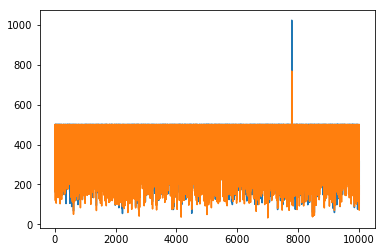

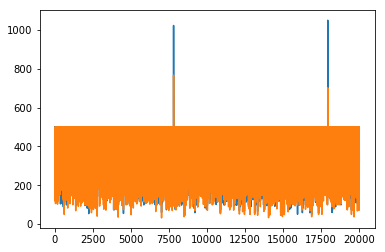

Dogs(mean,std)=(array([ 410.5203,  357.0189]), array([ 107.7027,   96.557 ])), 
Cats(Mean,Std)=(array([ 404.5503,  360.9335]), array([ 108.8802,   96.7458]))


In [49]:
#Understand the dimensions of the images
img_sizes=[]
def getMeanStdOfImages(path):
    for file in glob(path):
        img = Image.open(file)
        img_sizes.append(img.size)            
    plt.plot(img_sizes)
    plt.show()
    mean = np.mean(img_sizes,axis=0)
    std = np.std(img_sizes,axis=0)
    return mean,std    

dogsStats = getMeanStdOfImages('train/cats/*.jpg')
catsStats = getMeanStdOfImages('train/dogs/*.jpg')
print 'Dogs(mean,std)={}, \nCats(Mean,Std)={}'.format(dogsStats,catsStats)


In [52]:
#Look at the dimensions of one image
#RGB or Grey scale?
img = Image.open('train/cats/cat.5186.jpg')
img.size
arr = np.array(img)
arr.shape

(415, 499, 3)

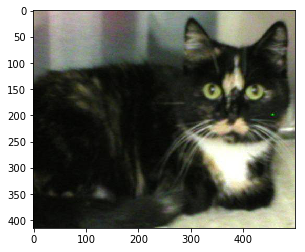

In [53]:
#Plot some images at random
imgplot = plt.imshow(img)

# Model

In [54]:
batch_size=64

In [4]:
from vgg16 import Vgg16
vgg = Vgg16()

In [5]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.ft(batches.nb_class)

NameError: name 'batch_size' is not defined

In [92]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
200/200 [==============================] - 7s - loss: 4.0563 - acc: 0.6100 - val_loss: 2.5789 - val_acc: 0.8400


In [7]:
vgg.model.save_weights(path+'results/10EpochsVGG.h5')

# Add batch normalization

In [4]:
from vgg16bn import Vgg16BN
vgg = Vgg16BN()


In [8]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
vgg.ft(batches.nb_class)

In [10]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 653s - loss: 0.2241 - acc: 0.9554 - val_loss: 0.1018 - val_acc: 0.9785


In [3]:
model = vgg_ft_bn(2)
model.summary()
model.compile()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  0           zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [ ]:
model.fit_generator(batches, )

In [34]:
#Separate Conv and FC models
last_conv_idx = [index for index,layer in enumerate(vgg.model.layers) 
                     if type(layer) is Convolution2D][-1]
conv_layers = vgg.model.layers[:last_conv_idx+1]
conv_model = Sequential(conv_layers)

In [29]:
fc_layers = vgg.model.layers[last_conv_idx+1:]
#len(fc_layers)

7

In [38]:
def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(p),
        BatchNormalization(axis=1),
        Dense(4096, activation='relu'),
        Dropout(p),
        BatchNormalization(axis=1),
        Dense(1000, activation='softmax')
        ]

In [39]:
bn_model = Sequential(get_bn_layers(0.6))
conv_model.add(bn_model)

Exception: You are attempting to share a same `BatchNormalization` layer across different data flows. This is not possible. You should use `mode=2` in `BatchNormalization`, which has a similar behavior but is shareable (see docs for a description of the behavior).

In [32]:
bn_model.load_weights('/home/ubuntu/nbs/data/kaggle/dogscats/results/vgg16_bn.h5')

Exception: You are trying to load a weight file containing 18 layers into a model with 5 layers.

In [ ]:
#Ran 2 more epochs and saved weights
vgg.fit(batches, val_batches, nb_epoch=2)

In [ ]:
vgg.model.save_weights(path+'results/vgg3.h5')

In [60]:
#Using Adam optimizer with 0.001 lr
vgg.model.compile(Adam(), 'categorical_crossentropy', metrics=['accuracy'])


In [ ]:
vgg.fit(batches, val_batches, nb_epoch=1)

In [ ]:
vgg.model.save_weights(path+'results/vgg4.h5')

In [ ]:
vgg.model.compile(Nadam(), 'categorical_crossentropy', metrics=['accuracy'])
vgg.fit(batches, val_batches, nb_epoch=1)

In [99]:
#Data augmentation
gen = image.ImageDataGenerator(rotation_range=15, width_shift_range=0.1, 
                               height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True, channel_shift_range=0.1)
batches = get_batches(path+'train', gen, batch_size=batch_size)
#vgg.fit(batches, val_batches, nb_epoch=1)

Found 23000 images belonging to 2 classes.


In [14]:
vgg.model.save_weights(path+'results/vgg5.h5')

In [65]:
batches.shape()

AttributeError: 'DirectoryIterator' object has no attribute 'shape'

In [8]:
vgg.model.load_weights(path+'results/10EpochsVGG.h5')

# Modify model

In [6]:
vgg.model.load_weights(path+'results/adam4.h5')

In [13]:
import pickle
def saveResults(handle, result):
    f = open(path + 'results/' + handle + '.result', 'wb')
    pickle.dump(result, f)
    f.close()

In [17]:
result = vgg.fit(batches, val_batches, nb_epoch=1)


Epoch 1/1
200/200 [==============================] - 7s - loss: 0.8715 - acc: 0.9450 - val_loss: 0.3224 - val_acc: 0.9800
Epoch 1/1
200/200 [==============================] - 7s - loss: 0.8141 - acc: 0.9450 - val_loss: 0.3224 - val_acc: 0.9800


In [16]:
print result

None


In [14]:
saveResults('test', result)

In [66]:
val_batches = get_batches(path+'valid', shuffle=False, batch_size=batch_size)

Found 2000 images belonging to 2 classes.


In [81]:
# Ensure that we return to theano dimension ordering
K.set_image_dim_ordering('th')

In [100]:
batches = get_batches(path+'train', gen, batch_size=batch_size)
# NB: We don't want to augment or shuffle the validation set
val_batches = get_batches(path+'valid', shuffle=False, batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
vgg.model.compile(Adam(), 'categorical_crossentropy', metrics=['accuracy'])
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/adam1.h5')
vgg.model.optimizer.lr=0.0001
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/adam2.h5')
vgg.fit(batches, val_batches, nb_epoch=2)
vgg.model.save_weights(path+'results/adam3.h5')
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/adam4.h5')
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/adam5.h5')
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/adam6.h5')
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/adam7.h5')
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/adam8.h5')
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/adam9.h5')
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/adam10.h5')
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/adam11.h5')
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/adam12.h5')
vgg.model.optimizer.lr=0.001
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/adam13.h5')
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/adam14.h5')
vgg.fit(batches, val_batches, nb_epoch=1)
vgg.model.save_weights(path+'results/adam15.h5')

Epoch 1/1
 4352/23000 [====>.........................] - ETA: 456s - loss: 0.6138 - acc: 0.9612

In [ ]:
## Remove drop outs
def noDropOutModel():
    

# Test

In [15]:
#Test on test data
test_batches, preds = vgg.test(path+'test', batch_size = batch_size*2)

Found 12500 images belonging to 1 classes.


# Generate Kaggle submission

In [43]:
#Generatae submission = fileNumber, prediction
#test_batches.filenames[:5]
#Generate ids
ids = [int(f[8:f.find('.')]) for f in test_batches.filenames]

In [40]:
#ids[:5]
#preds[0:5]

[9292, 12026, 9688, 4392, 779]

In [44]:
#Generate predictions
isdog = np.clip(preds[:,1], 0.01, 0.99)
isdog[:5]

array([ 0.01  ,  0.7047,  0.01  ,  0.01  ,  0.99  ], dtype=float32)

In [45]:
#join them row by row(axis =1)
subm = np.stack([ids,isdog], axis=1)

In [46]:
np.set_printoptions(suppress=True)
subm[:5]

array([[  9292.    ,      0.01  ],
       [ 12026.    ,      0.7047],
       [  9688.    ,      0.01  ],
       [  4392.    ,      0.01  ],
       [   779.    ,      0.99  ]])

In [47]:
np.savetxt('resnet_ga.csv', subm, fmt='%d,%.3f', header='id,label', comments='')
from IPython.display import FileLink
FileLink('resnet_ga.csv')

/home/ubuntu/nbs/resnet_ga.csv

# Explore predictions

In [45]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  0           zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [48]:
vgg.model.load_weights(path+'results/vgg5.h5')

In [8]:
#Explore the images which we were confident but got them wrong
val_batches, probs = vgg.test(path+'valid', batch_size = batch_size)

Found 2000 images belonging to 2 classes.


In [9]:
probs = probs[:,0]
preds = np.round(1-probs)

## How are probabilities distributed?

In [9]:
probs[:4]

array([ 1.,  1.,  1.,  1.], dtype=float32)

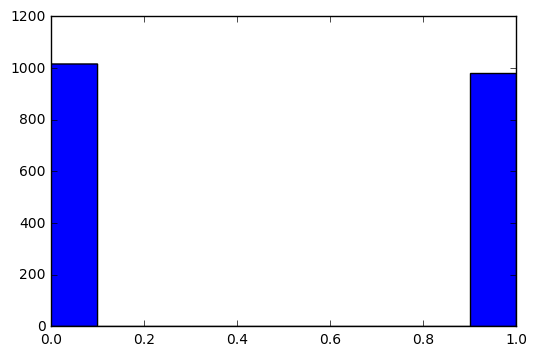

In [10]:
(n, bins, patches) = plt.hist(probs)
plt.show()

In [11]:
np.set_printoptions(suppress=True)
print n

[ 1020.     0.     0.     0.     0.     0.     0.     0.     0.   980.]


## Confusion matrix

In [11]:
cm = confusion_matrix(val_batches.classes,preds)

[[971  27]
 [ 13 989]]


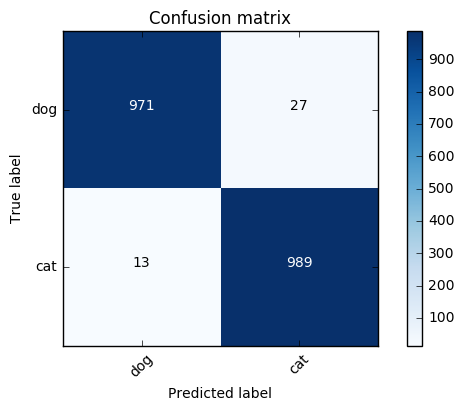

In [12]:
plot_confusion_matrix(cm, {'cat':0, 'dog':1})

In [18]:
val_batches.filenames[:5]

['cat/cat.1101.jpg',
 'cat/cat.9976.jpg',
 'cat/cat.2421.jpg',
 'cat/cat.1646.jpg',
 'cat/cat.7859.jpg']

In [51]:
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/' + val_batches.filenames[i]) for i in idx], titles=titles)

## Find images which have been predicted wrong with highest confidence

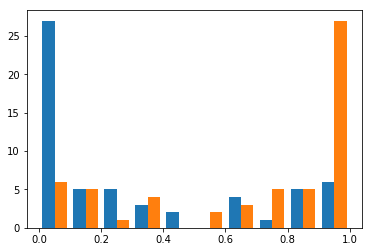

In [60]:
labels = val_batches.classes
mismatch_idx = np.where((preds!=labels))[0]
mismatch_probs = probs[mismatch_idx]
(n, bins, patches) = plt.hist(mismatch_probs)
plt.show()

In [59]:
mismatch_idx.size

90

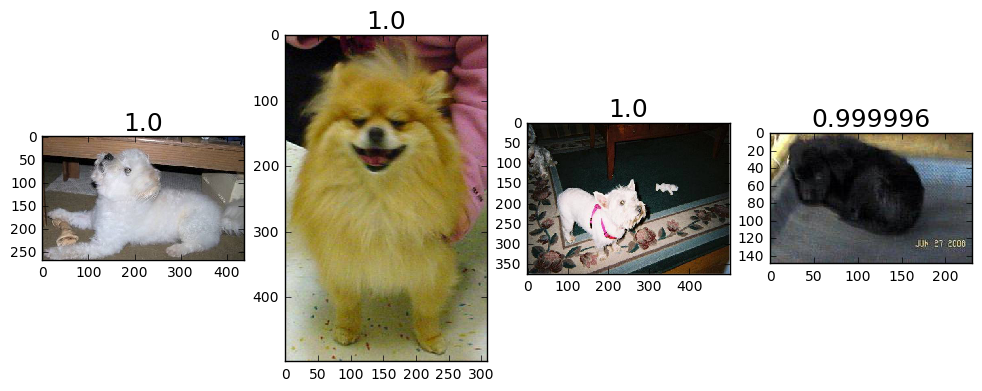

In [55]:
incorrect_cats = np.where((preds==0) &(preds!=labels))[0]
#incorrect_cats.size
most_incorrect_cats = np.argsort(probs[incorrect_cats])[::-1][8:12]
most_incorrect_cats
plots_idx(incorrect_cats[most_incorrect_cats], probs[incorrect_cats][most_incorrect_cats])

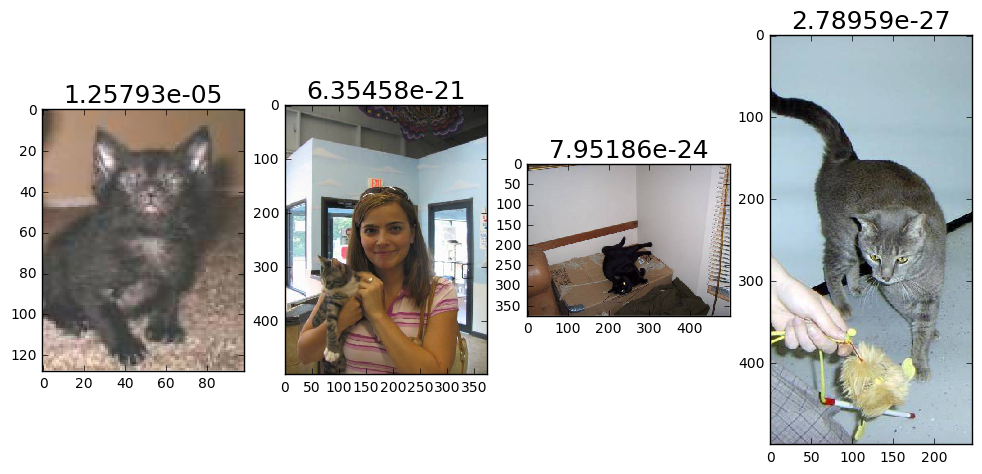

In [56]:
incorrect_dogs = np.where((preds==1) &(preds!=labels))[0]
#incorrect_cats.size
most_incorrect_dogs = np.argsort(probs[incorrect_dogs])[::-1][:4]
#most_incorrect_cats
plots_idx(incorrect_dogs[most_incorrect_dogs], probs[incorrect_dogs][most_incorrect_dogs])

In [57]:
#pred!=labels && 
#class=0 and prob[0] is highest: Dogs but predicted as cats
#val_batches.classes == 0
#predicted_cats = val_batches[val_batches.classes == 0]
n_view =4
labels = val_batches.classes
incorrect_cats = np.where((preds==0) & (preds!=labels))[0]
most_incorrect_cats = np.argsort(probs2[incorrect_cats])[::-1][:4]
most_incorrect_cats
plots_idx(incorrect_cats[most_incorrect_cats], probs2[incorrect_cats][most_incorrect_cats])
#class=1 and prob[0] is lowest


NameError: name 'probs2' is not defined

## Batch normalization


In [4]:
from vgg16bn import Vgg16BN
vgg = Vgg16BN()
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.ft(batches.nb_class)
vgg.model.save_weights("results/weights-improvement-14-0.98.hdf5")

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
#Test on test data
test_batches, preds = vgg.test(path+'test', batch_size = batch_size*2)

Found 12500 images belonging to 1 classes.


In [6]:
ids = [int(f[8:f.find('.')]) for f in test_batches.filenames]
isdog = np.clip(preds[:,1], 0.01, 0.99)
subm = np.stack([ids,isdog], axis=1)
np.set_printoptions(suppress=True)
subm[:5]

array([[  9292.    ,      0.2768],
       [ 12026.    ,      0.0996],
       [  9688.    ,      0.01  ],
       [  4392.    ,      0.7749],
       [   779.    ,      0.99  ]])

In [7]:
np.savetxt(path + 'results/cats_bn.csv', subm, fmt='%d,%.3f', header='id,label', comments='')
from IPython.display import FileLink
FileLink(path + 'results/cats_bn.csv')

/home/ubuntu/nbs/cats_bn.csv

In [8]:
FileLink(path + 'results/cats_bn.csv')

/home/ubuntu/nbs/data/kaggle/dogscats/results/cats_bn.csv

## Trying Resnet

In [56]:
%cd $CODE_DIR

/home/sravya/git/DL/dogscats


In [6]:
from resnet50 import Resnet50
rs_model = Resnet50(include_top=False)

/home/sravya/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [58]:
rs_model.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, 224, 224)   0                                            
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 3, 224, 224)   0           input_1[0][0]                    
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 230, 230)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 64, 112, 112)  9472        zeropadding2d_1[0][0]            
___________________________________________________________________________________________

In [7]:
path=DATA_DIR+'/'

In [9]:
batch_size=64
batches = get_batches(path+'train', batch_size=batch_size, shuffle=False)
val_batches = get_batches(path+'valid', batch_size=batch_size*2, shuffle=False)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [10]:
test_batches = get_batches(path+'test', batch_size=batch_size*2, shuffle=False)

Found 12500 images belonging to 1 classes.


In [13]:
trn_features = rs_model.model.predict_generator(batches, batches.nb_sample)

In [11]:
val_features = rs_model.model.predict_generator(val_batches, val_batches.nb_sample)

In [12]:
test_features = rs_model.model.predict_generator(test_batches, test_batches.nb_sample)

In [66]:
%cd $DATA_DIR
%mkdir results
%cd -

/home/sravya/data/catsdogs
/home/sravya/git/DL/dogscats


In [67]:
val_features

array([[[[ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    , ...,  0.3284,  0.    ,  0.051 ],
         ..., 
         [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ]],

        [[ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
         ..., 
         [ 0.    ,  0.    ,  0.    , ...,  0.9991,  1.3909,  1.2332],
         [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    , ...,  0.    ,  3.1559,  0.    ]],

        [[ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
         [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.  

In [77]:
test_features

array([[[[  1.0981e+00,   6.9635e+00,   6.1068e+00, ...,   0.0000e+00,   0.0000e+00,   0.0000e+00],
         [  0.0000e+00,   3.3524e-02,   2.7811e+00, ...,   2.5415e+00,   2.4912e+00,   0.0000e+00],
         [  1.2541e+00,   0.0000e+00,   0.0000e+00, ...,   0.0000e+00,   8.0929e-01,   0.0000e+00],
         ..., 
         [  0.0000e+00,   0.0000e+00,   1.9711e-01, ...,   0.0000e+00,   0.0000e+00,   0.0000e+00],
         [  0.0000e+00,   0.0000e+00,   0.0000e+00, ...,   0.0000e+00,   0.0000e+00,   0.0000e+00],
         [  0.0000e+00,   0.0000e+00,   3.1288e-01, ...,   0.0000e+00,   0.0000e+00,   0.0000e+00]],

        [[  8.7707e-02,   0.0000e+00,   0.0000e+00, ...,   0.0000e+00,   0.0000e+00,   0.0000e+00],
         [  0.0000e+00,   4.2634e+00,   1.0786e+00, ...,   0.0000e+00,   0.0000e+00,   0.0000e+00],
         [  1.6902e+00,   7.7226e+00,   0.0000e+00, ...,   0.0000e+00,   0.0000e+00,   0.0000e+00],
         ..., 
         [  0.0000e+00,   0.0000e+00,   0.0000e+00, ...,   1.6060e+0

In [14]:
save_array(path+'results/trn_features.dat', trn_features)
save_array(path+'results/val_features.dat', val_features)
save_array(path+'results/test_features.dat', test_features)

In [79]:
def get_fc_layers(p):
    return [
        BatchNormalization(axis=1, input_shape=rs_model.model.output_shape[1:]),
        Flatten(),
        Dropout(p),
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(p/2),
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(2, activation='softmax')
        ]

In [80]:
fc_model = Sequential(get_fc_layers(0.7))

In [81]:
fc_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
(val_classes, trn_classes, val_labels, trn_labels, 
    val_filenames, filenames, test_filenames) = get_classes(path)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [83]:
fc_model.fit(trn_features, trn_labels, validation_data=(val_features, val_labels), nb_epoch=2, batch_size=batch_size)

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 19s - loss: 1.0915 - acc: 0.5004 - val_loss: 0.7895 - val_acc: 0.3892

In [84]:
fc_model.fit(trn_features, trn_labels, validation_data=(val_features, val_labels), nb_epoch=2, batch_size=batch_size)

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 19s - loss: 0.6779 - acc: 0.6079 - val_loss: 0.7239 - val_acc: 0.5234

In [25]:
fc_model.fit(trn_features, trn_labels, validation_data=(val_features, val_labels), nb_epoch=10, batch_size=batch_size)

Train on 23000 samples, validate on 2000 samples
Epoch 1/10
23000/23000 [==============================] - 46s - loss: 0.9642 - acc: 0.5050 - val_loss: 0.7237 - val_acc: 0.4880
Epoch 2/10
23000/23000 [==============================] - 46s - loss: 0.7142 - acc: 0.5571 - val_loss: 0.7221 - val_acc: 0.4995
Epoch 3/10
23000/23000 [==============================] - 46s - loss: 0.6479 - acc: 0.6431 - val_loss: 0.7473 - val_acc: 0.5100
Epoch 4/10
23000/23000 [==============================] - 46s - loss: 0.5462 - acc: 0.7282 - val_loss: 0.8071 - val_acc: 0.5035
Epoch 5/10
23000/23000 [==============================] - 46s - loss: 0.4460 - acc: 0.7994 - val_loss: 0.9142 - val_acc: 0.4930
Epoch 6/10
23000/23000 [==============================] - 46s - loss: 0.3795 - acc: 0.8392 - val_loss: 0.9851 - val_acc: 0.5045
Epoch 7/10
23000/23000 [==============================] - 46s - loss: 0.3156 - acc: 0.8717 - val_loss: 1.0062 - val_acc: 0.5075
Epoch 8/10
20864/23000 [==========================>...]

KeyboardInterrupt: 

In [15]:
def get_ap_layers(p):
    return [
        GlobalAveragePooling2D(input_shape=rs_model.model.output_shape[1:]),
        Dropout(p),
        Dense(2, activation='softmax')
    ]

In [28]:
ap_model = Sequential(get_ap_layers(0.3))
ap_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
ap_model.fit(trn_features, trn_labels, validation_data=(val_features, val_labels), nb_epoch=10, batch_size=batch_size)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s - loss: 0.0829 - acc: 0.9665 - val_loss: 0.0329 - val_acc: 0.9874

In [30]:
ap_model.optimizer.lr = 0.00001

In [31]:
ap_model.fit(trn_features, trn_labels, validation_data=(val_features, val_labels), nb_epoch=3, batch_size=batch_size)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 2s - loss: 0.0277 - acc: 0.9899 - val_loss: 0.0347 - val_acc: 0.9876

In [22]:
ap_model.fit(trn_features, trn_labels, validation_data=(val_features, val_labels), nb_epoch=3, batch_size=batch_size)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 2s - loss: 0.0211 - acc: 0.9932 - val_loss: 0.0310 - val_acc: 0.9888

In [43]:
probs = ap_model.predict(val_features)

In [54]:
#All cats predictions
cats_probs = preds[:,0]
#0 for cat and 1 for dog
preds = np.round(1-cats_probs)

In [106]:
cats_probs[1], preds[1], val_batches.classes[1]

(0.0048949914, 1.0, 0)

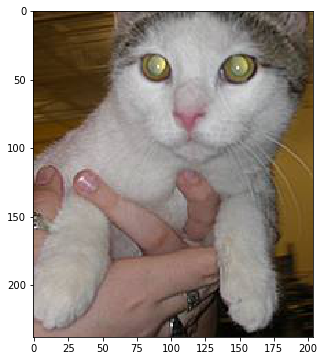

In [56]:
plots_idx([0])

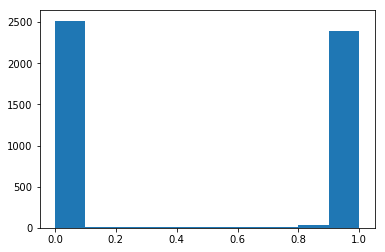

In [57]:
(n, bins, patches) = plt.hist(cats_probs)
plt.show()

In [162]:
cm = confusion_matrix(val_batches.classes,preds)
cm

array([[2437,   42],
       [  16, 2505]])

In [163]:
val_batches.class_indices

{'cats': 0, 'dogs': 1}

[[2437   42]
 [  16 2505]]


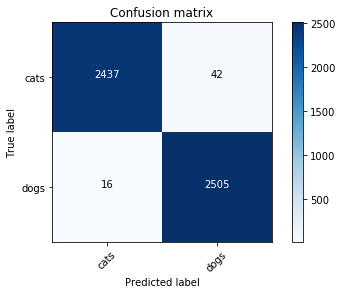

In [167]:
plot_confusion_matrix(cm, val_batches.class_indices)

[[2437   42]
 [  16 2505]]


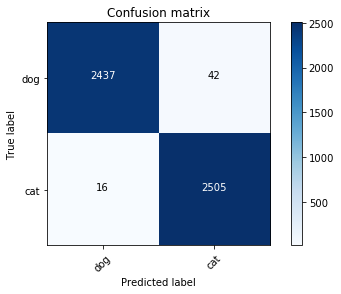

In [168]:
classes_dict = {'cat':0, 'dog':1}
plot_confusion_matrix(cm, classes_dict)

In [173]:
import operator
labels = sorted(val_batches.class_indices.keys(), key=operator.itemgetter(0))

[[2437   42]
 [  16 2505]]


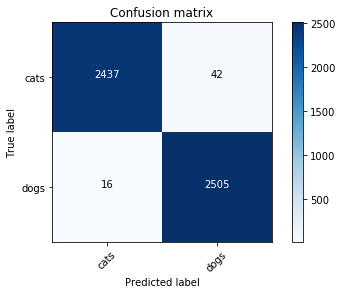

In [174]:
plot_confusion_matrix(cm, labels)

In [172]:
sorted_x

['cats', 'dogs']

In [148]:
{'cat':0, 'dog':1}

{'cat': 0, 'dog': 1}

In [149]:
val_batches.class_indices

{'cats': 0, 'dogs': 1}

In [145]:
a=[1,-1,1]
b=[1,0,-1]
confusion_matrix(a,b)

array([[0, 1, 0],
       [0, 0, 0],
       [1, 0, 1]])

In [146]:
val_batches.class_indices

{'cats': 0, 'dogs': 1}

In [133]:
cm

array([[2437,   42],
       [  16, 2505]])

In [61]:
labels = val_batches.classes

# Wrongly predicted as dogs

In [123]:
dog_like_cats = np.where((labels==0) & (labels!=preds))[0]
print "%d were predicted as dogs incorrectly" % len(dog_like_cats)

42 were predicted as dogs incorrectly


In [124]:
sorted_arr = np.argsort(cats_probs[dog_like_cats])
dog_like_cats_ordered = dog_like_cats[sorted_arr]

In [127]:
sorted_arr

array([11, 33, 23,  0, 12, 30, 20,  6, 24, 16, 17,  1,  8, 26, 10,  5, 38,  9, 39, 25, 29, 22, 15,
       35,  2, 32, 40, 14, 36, 18, 13, 27, 28,  4,  7, 21, 34, 37,  3, 41, 31, 19])

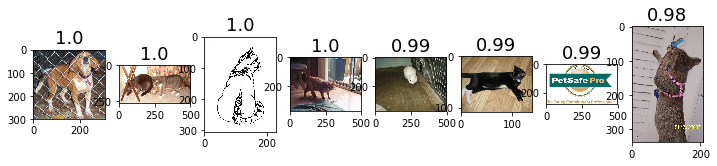

In [125]:
plots_idx(dog_like_cats_ordered[0:8], np.around(1-cats_probs[dog_like_cats_ordered[0:8]], decimals=2))

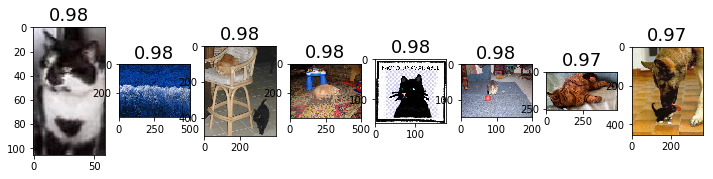

In [126]:
plots_idx(dog_like_cats_ordered[8:16], np.around(1-cats_probs[dog_like_cats_ordered[8:16]], decimals=2))

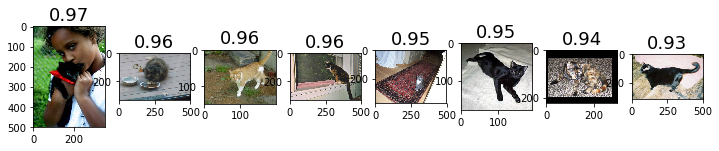

In [129]:
plots_idx(dog_like_cats_ordered[16:24], np.around(1-cats_probs[dog_like_cats_ordered[16:24]], decimals=2))

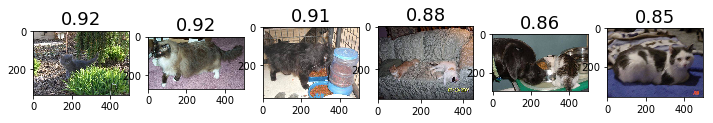

In [130]:
plots_idx(dog_like_cats_ordered[24:30], np.around(1-cats_probs[dog_like_cats_ordered[24:30]], decimals=2))

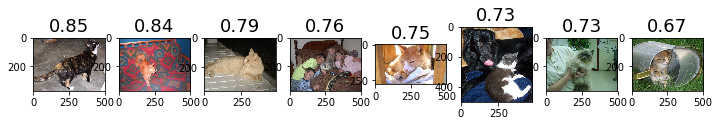

In [131]:
plots_idx(dog_like_cats_ordered[30:38], np.around(1-cats_probs[dog_like_cats_ordered[30:38]], decimals=2))

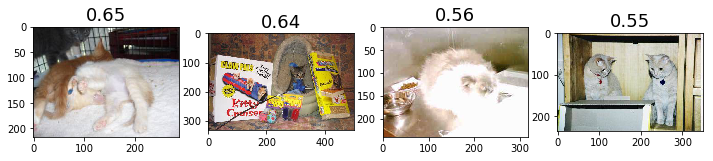

In [132]:
plots_idx(dog_like_cats_ordered[38:42], np.around(1-cats_probs[dog_like_cats_ordered[38:42]], decimals=2))

In [94]:
incorrect_cats


array([   1,   51,   93,  162,  188,  250,  484,  486,  590,  618,  645,  885,  920,  980, 1006,
       1075, 1077, 1173, 1189, 1257, 1408, 1472, 1537, 1617, 1681, 1722, 1792, 1804, 1806, 1932,
       1953, 2054, 2073, 2088, 2164, 2168, 2213, 2267, 2313, 2348, 2402, 2478])

In [128]:
val_filenames[11],labels[11], preds[11]

('cats/cat.8914.jpg', 0, 0.0)

In [98]:
result = val_classes==labels

In [100]:
for i in result:
    if i==False:
        print "Found mismatch"

In [108]:
val_batches.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)